In [21]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [22]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [23]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [24]:
%matplotlib inline

In [25]:
%store -r X_footsteps_accelerations_absolute
%store -r Y_footsteps_accelerations_absolute
%store -r X_footsteps_continuous_absolute
%store -r Y_footsteps_continuous_absolute
X_motion = np.concatenate((X_footsteps_accelerations_absolute, X_footsteps_continuous_absolute))
Y_motion = np.concatenate((Y_footsteps_accelerations_absolute, Y_footsteps_continuous_absolute))
print(X_motion.shape)
print(Y_motion.shape)

(3579, 35)
(3579, 4)


# Multivariate Linear Regression (Foot prediction)

In [26]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [27]:
## Entries where FL is swinging
idxs = np.where(X_motion[:, -2] == 1)[0]
X_motion_FL_swinging = X_motion[idxs]
Y_motion_FL_swinging = Y_motion[idxs]

## Predict FL foot -> x

In [28]:
X_motion_FL_swinging.shape

(1786, 35)

In [29]:
Y_motion_FL_swinging.shape

(1786, 4)

In [30]:
X_motion_FL_swinging[0:10, 0]

array([0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2])

### Linear Regression

In [31]:
# Input
X = np.hstack((X_motion_FL_swinging[:, :3], # Previous motion command
               X_motion_FL_swinging[:, -5:-2], # Current motion command
               X_motion_FL_swinging[:, 3:5], # FL (x,y) position
               X_motion_FL_swinging[:, 6:8], # FR (x,y) position
               X_motion_FL_swinging[:, 9:11], # RL (x,y) position
               X_motion_FL_swinging[:, 12:14])) # RR (x, y) position

# Target
Y = np.array([Y_motion_FL_swinging[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fl_relative_support_x = LinearRegression()

# Fit the model
model_fl_relative_support_x.fit(X_train, Y_train)
    
# Predict
predictions = model_fl_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9563738280151823
RMSE:  0.02252385536976068
The lowest error is:  5.372922233262689e-05
The highest error is:  0.13145994984999437
The avg. error is:  0.015790412308537508


In [32]:
model_fl_relative_support_x.coef_

array([[ 2.41549573e-01, -1.79198331e+07,  2.84488712e+11,
         1.96172990e-01,  1.17793287e+08, -2.84488712e+11,
        -5.73344342e-01,  4.79932587e-01,  8.03244330e-01,
        -1.95762539e+00, -1.70765880e+00,  2.48332765e+00,
        -2.30944301e-01, -8.07740847e-01]])

In [33]:
model_fl_relative_support_x.intercept_

array([-1.33612258])

Text(0, 0.5, 'Predictions')

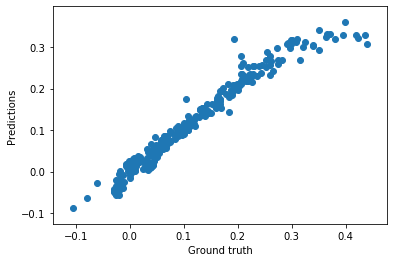

In [34]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [35]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

### Predict FL foot -> y

In [36]:
# Input
X = np.hstack((X_motion_FL_swinging[:, :3], # Previous motion command
               X_motion_FL_swinging[:, -5:-2], # Current motion command
               X_motion_FL_swinging[:, 3:5], # FL (x,y) position
               X_motion_FL_swinging[:, 6:8], # FR (x,y) position
               X_motion_FL_swinging[:, 9:11], # RL (x,y) position
               X_motion_FL_swinging[:, 12:14])) # RR (x, y) position

# Target
Y = np.array([Y_motion_FL_swinging[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fl_relative_support_y = LinearRegression()

# Fit the model
model_fl_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_fl_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9010997825793431
RMSE:  0.006433933910294442
The lowest error is:  4.791644570262266e-06
The highest error is:  0.037327493225341034
The avg. error is:  0.004709512923764813


In [37]:
model_fl_relative_support_y.coef_

array([[ 5.49655237e-02, -9.38860465e+06,  1.49050051e+11,
        -4.17727213e-02,  6.17145590e+07, -1.49050051e+11,
         1.05509114e-01, -6.56532713e-01, -3.81981265e-01,
        -2.37142897e-01,  2.16529494e-01,  4.53854708e-01,
        -6.61787772e-02, -4.33368561e-02]])

In [38]:
model_fl_relative_support_y.intercept_

array([0.10301452])

Text(0, 0.5, 'Predictions')

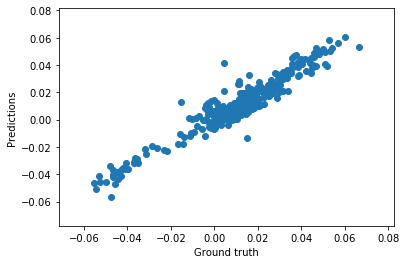

In [39]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [20]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')